In [12]:
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plot
import numpy as np
from skimage import color
from skimage import io

In [13]:
current_dir = os.getcwd()
print(current_dir)

E:\UNet


In [14]:
img1 = Image.open("./Carvana/train/0cdf5b5d0ce1_01.jpg")

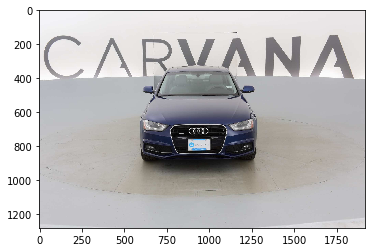

In [15]:
plot.imshow(img1)

In [16]:
img1_np = np.array(img1)
print(img1_np.shape)
print(img1_np[:, 560])

(1280, 1918, 3)
[[239 237 238]
 [239 237 238]
 [239 237 238]
 ...
 [195 194 199]
 [195 194 199]
 [195 194 199]]


In [17]:
print(img1_np[:, 220, 1])
print(img1_np.shape)

[243 243 243 ... 216 216 217]
(1280, 1918, 3)


In [18]:
files = os.listdir("./Carvana/train/")
print(files)

['00087a6bd4dc_01.jpg', '00087a6bd4dc_02.jpg', '00087a6bd4dc_03.jpg', '00087a6bd4dc_04.jpg', '00087a6bd4dc_05.jpg', '00087a6bd4dc_06.jpg', '00087a6bd4dc_07.jpg', '00087a6bd4dc_08.jpg', '00087a6bd4dc_09.jpg', '00087a6bd4dc_10.jpg', '00087a6bd4dc_11.jpg', '00087a6bd4dc_12.jpg', '00087a6bd4dc_13.jpg', '00087a6bd4dc_14.jpg', '00087a6bd4dc_15.jpg', '00087a6bd4dc_16.jpg', '02159e548029_01.jpg', '02159e548029_02.jpg', '02159e548029_03.jpg', '02159e548029_04.jpg', '02159e548029_05.jpg', '02159e548029_06.jpg', '02159e548029_07.jpg', '02159e548029_08.jpg', '02159e548029_09.jpg', '02159e548029_10.jpg', '02159e548029_11.jpg', '02159e548029_12.jpg', '02159e548029_13.jpg', '02159e548029_14.jpg', '02159e548029_15.jpg', '02159e548029_16.jpg', '03a857ce842d_01.jpg', '03a857ce842d_02.jpg', '03a857ce842d_03.jpg', '03a857ce842d_04.jpg', '03a857ce842d_05.jpg', '03a857ce842d_06.jpg', '03a857ce842d_07.jpg', '03a857ce842d_08.jpg', '03a857ce842d_09.jpg', '03a857ce842d_10.jpg', '03a857ce842d_11.jpg', '03a857ce8

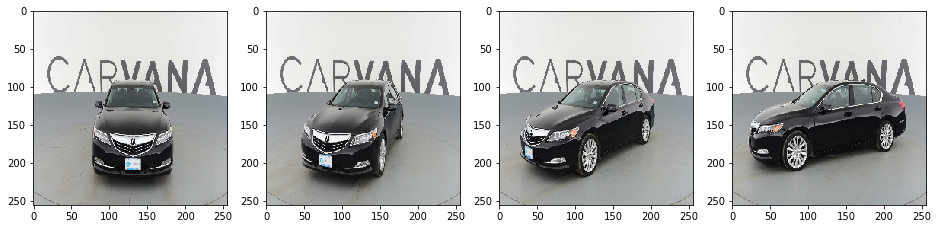

In [26]:
images = []
for i in range(0,16):
    img_temp = Image.open(f"./Carvana/train/{files[i]}")
    images.append(np.array(img_temp.resize((256,256))))


fig = plot.figure(figsize = (16, 16))
for i in range(1, 5):
    fig.add_subplot(1, 4, i)
    plot.imshow(images[i-1])
plot.show()

In [28]:
mask1 = Image.open("./Carvana/train_masks/0cdf5b5d0ce1_01_mask.gif")

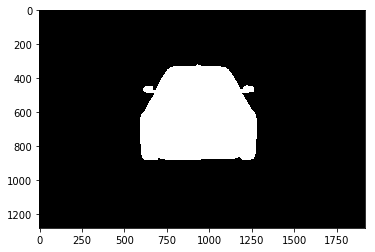

In [29]:
plot.imshow(mask1)

In [35]:
mask1_np = np.array(mask1)
print(mask1_np.shape)
print(mask1_np[600, 800])
print(mask1_np[1000, 800])

(1280, 1918)
1
0


In [36]:
mfiles = os.listdir("./Carvana/train_masks/")
print(mfiles)

['00087a6bd4dc_01_mask.gif', '00087a6bd4dc_02_mask.gif', '00087a6bd4dc_03_mask.gif', '00087a6bd4dc_04_mask.gif', '00087a6bd4dc_05_mask.gif', '00087a6bd4dc_06_mask.gif', '00087a6bd4dc_07_mask.gif', '00087a6bd4dc_08_mask.gif', '00087a6bd4dc_09_mask.gif', '00087a6bd4dc_10_mask.gif', '00087a6bd4dc_11_mask.gif', '00087a6bd4dc_12_mask.gif', '00087a6bd4dc_13_mask.gif', '00087a6bd4dc_14_mask.gif', '00087a6bd4dc_15_mask.gif', '00087a6bd4dc_16_mask.gif', '02159e548029_01_mask.gif', '02159e548029_02_mask.gif', '02159e548029_03_mask.gif', '02159e548029_04_mask.gif', '02159e548029_05_mask.gif', '02159e548029_06_mask.gif', '02159e548029_07_mask.gif', '02159e548029_08_mask.gif', '02159e548029_09_mask.gif', '02159e548029_10_mask.gif', '02159e548029_11_mask.gif', '02159e548029_12_mask.gif', '02159e548029_13_mask.gif', '02159e548029_14_mask.gif', '02159e548029_15_mask.gif', '02159e548029_16_mask.gif', '03a857ce842d_01_mask.gif', '03a857ce842d_02_mask.gif', '03a857ce842d_03_mask.gif', '03a857ce842d_04_ma

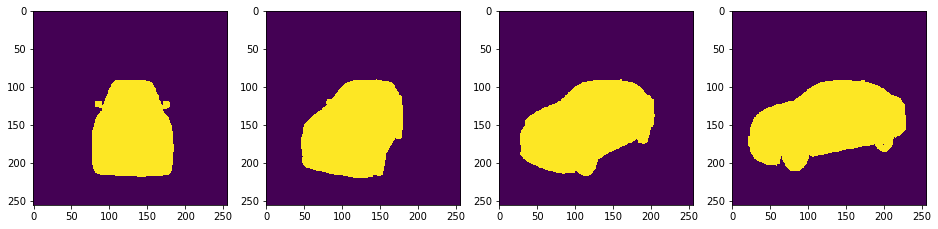

In [38]:
image_masks = []
for i in range(0,16):
    img_temp = Image.open(f"./Carvana/train_masks/{mfiles[i]}")
    image_masks.append(np.array(img_temp.resize((256,256))))


fig1 = plot.figure(figsize = (16, 16))
for i in range(1, 5):
    fig1.add_subplot(1, 4, i)
    plot.imshow(image_masks[i-1])
plot.show()

In [40]:
print(image_masks[0][:, 85])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
y_train = []
for i in range(len(labels)):
    y_train.append(np.expand_dims(labels[i], axis=0))
    print(y_train[i].shape)

NameError: name 'labels' is not defined

In [ ]:
np.save("labels1", y_train)

In [ ]:
files_train = os.listdir(f"{current_dir}\\test\\actual")

train_images = []

for i in range(0,len(files_train)):
    img_temp = Image.open(f"{current_dir}\\test\\actual\\{files_train[i]}").convert('L') 
    train_images.append(np.array(img_temp.resize((316,316), resample=PIL.Image.NEAREST))/255)

print(train_images[0][:,230])
plot.imshow(train_images[0])

In [ ]:
x_train = []
for i in range(len(train_images)):
    x_train.append(np.expand_dims(train_images[i], axis=2))
    x_train[i] = np.expand_dims(x_train[i], axis=0)
    print(x_train[i].shape)

In [ ]:
np.save("train_imgs1", x_train)

In [ ]:
X_train = np.load("train_imgs1.npy")

In [ ]:
print(X_train.shape)
print(X_train[0].shape)

In [ ]:
Y_train = np.load("labels1.npy")

In [ ]:
print(Y_train.shape)
print(Y_train[0].shape)

In [ ]:
import tensorflow as tf

X = tf.placeholder(tf.float32, shape=(1,316,316,1))
y = tf.placeholder(tf.float32, shape=(1,316,316,22))
y_cut = tf.slice(y, begin=[0, 92, 92, 0], size=[-1, 132, 132, -1])


with tf.Session() as sess:
# image = tf.expand_dims(image, 0)
    print(X.eval(feed_dict={X:X_train[0]}))
    _, y_image = sess.run([y, y_cut], feed_dict={y:Y_train[0]})
    plot.imshow(y_image[0,:,:,21])

In [ ]:
y1 = Y_train[0][0,93:225,93:225,21]
print(y1.shape)
plot.imshow(y1)

In [ ]:
print([len(X_train), len(Y_train)])

In [ ]:
for i in range(len(Y_train)):
    print(X_train[i].shape)
    print(Y_train[i].shape)

In [ ]:
mean = np.mean(X_train, axis=0)
print(mean[0,20,20,0])
print("......")
sum = 0
for i in range(len(X_train)):
    print(X_train[i][0,20,20,0])
    sum += X_train[i][0,20,20,0]
sum = sum / 20
print("......")
print(sum)

In [ ]:
plot.imshow(X_train[0][0,:,:,0])

In [ ]:
X_train[0] = X_train[0] - mean
plot.imshow(X_train[0][])